# Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.font_manager as fm
import matplotlib
import itertools

In [2]:
fm.get_fontconfig_fonts()
font_location = 'C:\\WINDOWS\\Fonts\\malgun.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_14740\2582751676.py:1: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


In [3]:
FILES_DIR = '../data/a1/'
log_df = pd.read_csv(FILES_DIR + 'log_csv.csv')

In [4]:
log = log_df.copy()
log

,Unnamed: 0,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
2,2,r8DXy2OtSl8AAojG,View,패브릭,커튼·부자재,암막커튼,2022-12-29 17:11:30,Seoul,iOS,100.0,947
3,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
...,...,...,...,...,...,...,...,...,...,...,...
5659536,5659536,PUpxWWMWdcIACR2B,View,주방용품,칼·커팅기구,채칼·다지기·강판,2022-12-28 20:01:30,Seoul,Android,100.0,13893
5659537,5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217
5659539,5659539,dusFzWJvp5cADhZW,View,가전·디지털,계절가전,전기히터·온풍기,2022-12-28 11:07:30,Seoul,Android,100.0,54030


In [5]:
# null값들을 un_** 으로 채워서 확인해보기
log_drop_null = log
log_drop_null['geoip_city_name'].fillna('un_city_name', inplace = True)
log_drop_null['category3'].fillna('un_category', inplace = True)
log_drop_null['uid'].fillna('un_name', inplace = True)
log_drop_null.dropna(axis = 0, inplace = True)
print(log_drop_null.isnull().sum().sort_values(ascending=False)) # null값 퍼센트로 표현

Unnamed: 0         0
uid                0
action_type        0
category1          0
category2          0
category3          0
collect_time       0
geoip_city_name    0
useragent_os       0
viewrate           0
viewtime           0
dtype: int64


# Log Analysis

In [6]:
log_drop_null

,Unnamed: 0,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
2,2,r8DXy2OtSl8AAojG,View,패브릭,커튼·부자재,암막커튼,2022-12-29 17:11:30,Seoul,iOS,100.0,947
3,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
...,...,...,...,...,...,...,...,...,...,...,...
5659536,5659536,PUpxWWMWdcIACR2B,View,주방용품,칼·커팅기구,채칼·다지기·강판,2022-12-28 20:01:30,Seoul,Android,100.0,13893
5659537,5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217
5659539,5659539,dusFzWJvp5cADhZW,View,가전·디지털,계절가전,전기히터·온풍기,2022-12-28 11:07:30,Seoul,Android,100.0,54030


In [7]:
basket_hour = log_drop_null.loc[log_drop_null['action_type'] == 'Basket']
basket_hour

,Unnamed: 0,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
1,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
5,5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,2022-12-29 17:53:11,Incheon,Windows,0.0,0
32,32,tqzAY2DMOxsADYls,Basket,패브릭,러그·카페트,극세사·단모러그,2022-12-29 11:00:45,Mapo-gu,Windows,0.0,0
82,82,2pFxQ2OtB9YADV3E,Basket,수납·정리,옷정리·이불정리,서랍칸막이·수납함,2022-12-29 12:43:21,Seoul,Windows,0.0,0
87,87,Dj8PAV/W7asADnq1,Basket,가구,소파,일반소파,2022-12-29 11:48:43,Gangnam-gu,Windows,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
5659426,5659426,DieEzGOr/CoAC8gg,Basket,패브릭,매트리스커버,un_category,2022-12-28 22:36:19,Seoul,Mac OS X,0.0,0
5659444,5659444,0/15ImMIN1MAA8Hj,Basket,주방용품,주방수납·정리,주방선반·정리대,2022-12-29 10:27:10,Gwangju,Windows,0.0,0
5659496,5659496,09ocl2GmwHMACxrF,Basket,주방용품,그릇·홈세트,접시·플레이트,2022-12-28 15:30:03,Seoul,Windows,0.0,0
5659532,5659532,cLkIu2OXMw8AA9Dr,Basket,주방용품,주방수납·정리,홀더,2022-12-28 22:14:15,Haman,Windows,0.0,0


In [8]:
basket_hour["action_type"] = np.where((basket_hour['action_type'] == 'Basket'), 1,0)

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_14740\1352134481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basket_hour["action_type"] = np.where((basket_hour['action_type'] == 'Basket'), 1,0)


In [9]:
uid_df = pd.DataFrame({'count': basket_hour.groupby(['uid', 'category1']).size()})
uid_df = uid_df.reset_index()
uid_df.sort_values(by='count', ascending=False)

,uid,category1,count
44712,d8NU6WLTwpsABiu3,주방용품,233
26959,J3hahWOoaWwACu2M,유아·아동,136
44713,d8NU6WLTwpsABiu3,캠핑용품,129
32656,OxOIoF8C8mcAAgUs,생활용품,120
15277,3HqgCmN0My4ADcBK,주방용품,113
...,...,...,...
17425,3afBZGOfOO4AA8JS,패브릭,1
17422,3af7GmKXH6EADcL5,생활용품,1
41974,cN69WmLiL0QABxW8,데코·식물,1
17421,3af6sGHmOIAABQiw,패브릭,1


In [10]:
uid_info = uid_df

In [11]:
user_info = basket_hour.groupby('uid')['category1'].count()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

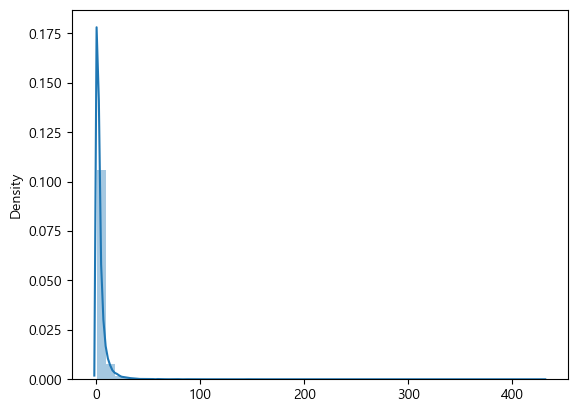

In [12]:
sns.distplot(user_info.values)

In [13]:
cat_df = pd.DataFrame({'count': basket_hour.groupby(['category1', 'uid']).size()})
cat_df = cat_df.reset_index()
cat_df.sort_values(by='count', ascending=False)

,category1,uid,count
54924,주방용품,d8NU6WLTwpsABiu3,233
46223,유아·아동,J3hahWOoaWwACu2M,136
58220,캠핑용품,d8NU6WLTwpsABiu3,129
34583,생활용품,OxOIoF8C8mcAAgUs,120
51251,주방용품,3HqgCmN0My4ADcBK,113
...,...,...,...
32376,생활용품,0zp9RmMj8OgAAN8m,1
32379,생활용품,0zqoQGOoLLkAAv65,1
32380,생활용품,0zr0o2Ohd+YABQs1,1
32381,생활용품,0zr3t2Or0HwAD0Gu,1


In [14]:
cat_df = pd.DataFrame({
    'cat_count': basket_hour.groupby('category1')['uid'].count()
})
cat_df = cat_df.reset_index()
print(cat_df.shape)
print(cat_df)

(48, 2)
                  category1  cat_count
0               Decor Plant         14
1   Home Appliances Digital          6
2           Household goods          2
3     Storage, organization          9
4                 Tool, DIY          1
5           daily necessity          1
6                    fabric         12
7                 furniture         96
8              infant child          5
9          kitchen utensils         94
10                    light          1
11  Đồ gia dụng Kỹ thuật số          1
12                   мебель          5
13                   ファブリック          2
14                     伴侶動物          7
15                        光          3
16                     厨房用具         22
17                    存储、组织          6
18                    存儲、組織          2
19                       家具          6
20                     家庭用品          2
21                    家电 数码          8
22                    幼児・児童          1
23                     廚房用具          1
24               

In [15]:
cat_df.sort_values(by='cat_count', ascending=False)

,category1,cat_count
29,가구,46143
45,주방용품,27667
47,패브릭,25072
38,수납·정리,14957
33,데코·식물,14599
37,생활용품,13539
31,가전·디지털,8741
44,조명,4750
32,공구·DIY,3493
36,생필품,2352


In [16]:
cat_df['cat_count'].describe()

count       48.000000
mean      3477.395833
std       8855.164993
min          1.000000
25%          2.000000
50%         10.500000
75%       1096.000000
max      46143.000000
Name: cat_count, dtype: float64

In [17]:
# 중위값으로 10.5로 해야하나 아니면 1000위로 해야하나...

cat_avg_up = cat_df[cat_df['cat_count'] > 1000].sort_values(by='cat_count', ascending=False)
cat_avg_up

,category1,cat_count
29,가구,46143
45,주방용품,27667
47,패브릭,25072
38,수납·정리,14957
33,데코·식물,14599
37,생활용품,13539
31,가전·디지털,8741
44,조명,4750
32,공구·DIY,3493
36,생필품,2352


In [18]:
cat_avg_up_list = list(set(cat_avg_up['category1']))
len(cat_avg_up_list)

14

In [19]:
cat_isin = basket_hour[basket_hour['category1'].isin(cat_avg_up_list)]
cat_isin

,Unnamed: 0,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
1,1,0+5vEmGkOuAAB5j2,1,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
5,5,091fXGIDYFEABcpA,1,수납·정리,화장대·테이블정리,티슈커버·케이스,2022-12-29 17:53:11,Incheon,Windows,0.0,0
32,32,tqzAY2DMOxsADYls,1,패브릭,러그·카페트,극세사·단모러그,2022-12-29 11:00:45,Mapo-gu,Windows,0.0,0
82,82,2pFxQ2OtB9YADV3E,1,수납·정리,옷정리·이불정리,서랍칸막이·수납함,2022-12-29 12:43:21,Seoul,Windows,0.0,0
87,87,Dj8PAV/W7asADnq1,1,가구,소파,일반소파,2022-12-29 11:48:43,Gangnam-gu,Windows,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
5659426,5659426,DieEzGOr/CoAC8gg,1,패브릭,매트리스커버,un_category,2022-12-28 22:36:19,Seoul,Mac OS X,0.0,0
5659444,5659444,0/15ImMIN1MAA8Hj,1,주방용품,주방수납·정리,주방선반·정리대,2022-12-29 10:27:10,Gwangju,Windows,0.0,0
5659496,5659496,09ocl2GmwHMACxrF,1,주방용품,그릇·홈세트,접시·플레이트,2022-12-28 15:30:03,Seoul,Windows,0.0,0
5659532,5659532,cLkIu2OXMw8AA9Dr,1,주방용품,주방수납·정리,홀더,2022-12-28 22:14:15,Haman,Windows,0.0,0


In [20]:
cat_uid = pd.DataFrame({'count': cat_isin.groupby(['uid', 'category1']).size()})
cat_uid = cat_uid.reset_index()
cat_uid = cat_uid.sort_values(by='count', ascending=False)
cat_uid = cat_uid.iloc[:1000]
cat_uid

,uid,category1,count
44435,d8NU6WLTwpsABiu3,주방용품,233
26792,J3hahWOoaWwACu2M,유아·아동,136
44436,d8NU6WLTwpsABiu3,캠핑용품,129
32451,OxOIoF8C8mcAAgUs,생활용품,120
15191,3HqgCmN0My4ADcBK,주방용품,113
...,...,...,...
45729,dCwTJ2KnHBsABiRh,데코·식물,12
2171,02n1ZmEwsbAAC7Uy,생활용품,12
53481,eaSCE2IrDHUADZAe,수납·정리,12
28633,OkFztWOmcX4ACVpR,주방용품,12


uid별 set을 한다음에 uid별로 어떤걸 cat을 basket을 한것을 찾아보자